<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de precios históricos 

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://1000marcas.net/wp-content/uploads/2020/12/Microsoft-Excel-Logo.png" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 10)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [7]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

In [8]:
# Cargamos hoja de calculo en un dataframe
file_name = 'Precios/AAPL.csv'
aapl = pd.read_csv(file_name)
aapl

Date        Open        High         Low       Close   Adj Close  \
0    2019-04-29  204.399994  205.970001  203.860001  204.610001  201.966461   
1    2019-04-30  203.059998  203.399994  199.110001  200.669998  198.077362   
2    2019-05-01  209.880005  215.309998  209.229996  210.520004  207.800110   
3    2019-05-02  209.839996  212.649994  208.130005  209.149994  206.447800   
4    2019-05-03  210.889999  211.839996  210.229996  211.750000  209.014221   
..          ...         ...         ...         ...         ...         ...   
248  2020-04-22  273.609985  277.899994  272.200012  276.100006  276.100006   
249  2020-04-23  275.869995  281.750000  274.869995  275.029999  275.029999   
250  2020-04-24  277.200012  283.010010  277.000000  282.970001  282.970001   
251  2020-04-27  281.799988  284.540009  279.950012  283.170013  283.170013   
252  2020-04-28  285.079987  285.829987  283.779999  284.714996  284.714996   

       Volume  
0    22204700  
1    46534900  
2    64827300  
3    31996300  
4    20892400  
..        ...  
248  29264300  
249  31203600  
250  31627200  
251  29236400  
252   4525737  

[253 rows x 7 columns]

#### Anotación #1
- Quisieramos indizar por fecha.

In [9]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'])
aapl

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-29  204.399994  205.970001  203.860001  204.610001  201.966461   
2019-04-30  203.059998  203.399994  199.110001  200.669998  198.077362   
2019-05-01  209.880005  215.309998  209.229996  210.520004  207.800110   
2019-05-02  209.839996  212.649994  208.130005  209.149994  206.447800   
2019-05-03  210.889999  211.839996  210.229996  211.750000  209.014221   
...                ...         ...         ...         ...         ...   
2020-04-22  273.609985  277.899994  272.200012  276.100006  276.100006   
2020-04-23  275.869995  281.750000  274.869995  275.029999  275.029999   
2020-04-24  277.200012  283.010010  277.000000  282.970001  282.970001   
2020-04-27  281.799988  284.540009  279.950012  283.170013  283.170013   
2020-04-28  285.079987  285.829987  283.779999  284.714996  284.714996   

              Volume  
Date                  
2019-04-29  22204700  
2019-04-30  46534900  
2019-05-01  64827300  
2019-05-02  31996300  
2019-05-03  20892400  
...              ...  
2020-04-22  29264300  
2020-04-23  31203600  
2020-04-24  31627200  
2020-04-27  29236400  
2020-04-28   4525737  

[253 rows x 6 columns]

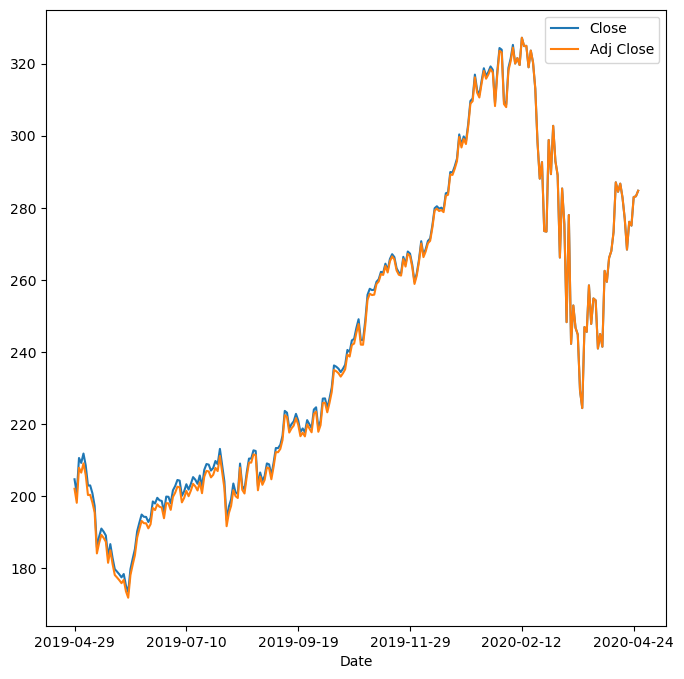

In [10]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
%matplotlib inline
aapl[['Close', 'Adj Close']].plot(figsize=(8,8))
plt.show()

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [11]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'] ,usecols=['Date', 'Adj Close'])
aapl.columns = ['AAPL']
aapl

AAPL
Date                  
2019-04-29  201.966461
2019-04-30  198.077362
2019-05-01  207.800110
2019-05-02  206.447800
2019-05-03  209.014221
...                ...
2020-04-22  276.100006
2020-04-23  275.029999
2020-04-24  282.970001
2020-04-27  283.170013
2020-04-28  284.714996

[253 rows x 1 columns]

**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

> Leer archivos usando el paquete `os`: [link](https://realpython.com/working-with-files-in-python/)

In [12]:
import os 
basepath = 'Precios'
os.path.isfile(os.path.join(basepath, os.listdir(basepath)[0]))

True

In [17]:
import os

# List all files in a directory using os.listdir ---> os.path.isfile check if is a file
basepath = 'Precios'

# Poner en una lista todos los nombres de los archivos
files = [os.path.join(basepath, name) for name in os.listdir(basepath) if os.path.isfile(os.path.join(basepath, name))]
files

['Precios/AMZN.csv', 'Precios/KO.csv', 'Precios/NKE.csv', 'Precios/AAPL.csv']

In [18]:
[i.split('.')[0] for i in os.listdir(basepath)]

['AMZN', 'KO', 'NKE', 'AAPL']

In [20]:
pd.concat([pd.read_csv(file_i, index_col=['Date'], usecols=['Date', 'Adj Close']) for file_i in files], axis=1)

Adj Close  Adj Close  Adj Close   Adj Close
Date                                                     
2019-04-29  1938.430054  46.930996  87.317513  201.966461
2019-04-30  1926.520020  47.551323  86.892097  198.077362
2019-05-01  1911.520020  47.095772  84.982697  207.800110
2019-05-02  1900.819946  46.901920  84.359428  206.447800
2019-05-03  1962.459961  47.221779  84.784836  209.014221
...                 ...        ...        ...         ...
2020-04-22  2363.489990  45.680000  88.769997  276.100006
2020-04-23  2399.449951  45.070000  87.349998  275.029999
2020-04-24  2410.219971  45.430000  88.370003  282.970001
2020-04-27  2376.000000  46.779999  89.370003  283.170013
2020-04-28  2353.669922  47.299999  89.800003  284.714996

[253 rows x 4 columns]

In [21]:
# Read the data of Adj Close for each file and concatenate each one
data = pd.concat([pd.read_csv(file_i, index_col=['Date'], usecols=['Date', 'Adj Close']) for file_i in files],
                 axis=1)

# Rename columns
data.columns = [i.split('.')[0] for i in os.listdir(basepath)]
data

AMZN         KO        NKE        AAPL
Date                                                     
2019-04-29  1938.430054  46.930996  87.317513  201.966461
2019-04-30  1926.520020  47.551323  86.892097  198.077362
2019-05-01  1911.520020  47.095772  84.982697  207.800110
2019-05-02  1900.819946  46.901920  84.359428  206.447800
2019-05-03  1962.459961  47.221779  84.784836  209.014221
...                 ...        ...        ...         ...
2020-04-22  2363.489990  45.680000  88.769997  276.100006
2020-04-23  2399.449951  45.070000  87.349998  275.029999
2020-04-24  2410.219971  45.430000  88.370003  282.970001
2020-04-27  2376.000000  46.779999  89.370003  283.170013
2020-04-28  2353.669922  47.299999  89.800003  284.714996

[253 rows x 4 columns]

<Axes: xlabel='Date'>

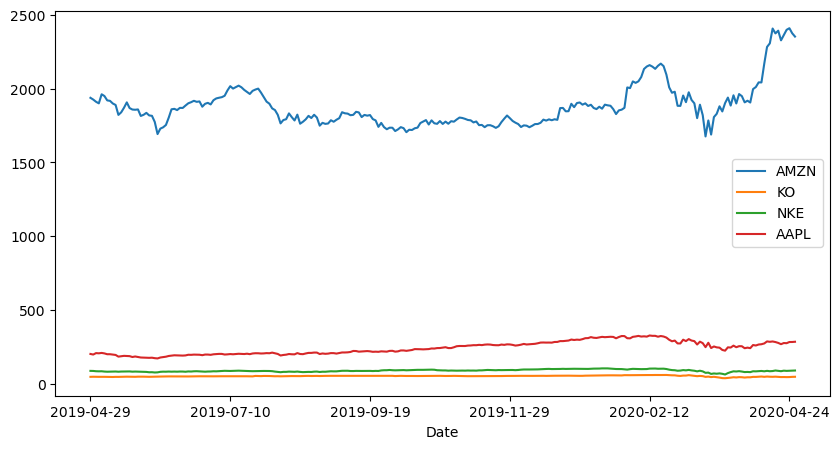

In [22]:
# Graficar los precios de AAPL y AMZN en una sóla gráfica
data.plot(figsize=(10, 5))

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: **conda install pandas-datareader**;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [12]:
%conda install pandas-datareader

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39hecd8cb5_0         423 KB
    conda-23.3.1               |   py39hecd8cb5_0         962 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/osx-64::boltons-23.0.0-py39hecd8cb5_0 
  jsonpatch          pkgs/main/noarch::jsonpatch-1.32-pyhd3eb1b0_0 
  jsonpointer        pkgs/main/noarch::jsonpointer-2.1-pyhd3eb1b0_0 

The following packages

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [2]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: se tiene acceso a su api a través de Stooq Index Data.
 - Quandl: solo permite descargar datos de equities estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea usar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.
 
 > Enlace de las API disponibles de DataReader [link](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

In [3]:
datetime.today()

datetime.datetime(2023, 11, 2, 20, 41, 20, 521258)

In [4]:
# Ejemplo google finance 
ticker = 'AAPL'
source = 'stooq'
start = '2015-01-01'
end = datetime.today()
aapl_goo = web.DataReader(ticker, source, start=start)
aapl_goo

Open      High       Low     Close        Volume
Date                                                            
2023-11-02  175.5200  177.7800  175.4600  177.5700  7.672078e+07
2023-11-01  171.0000  174.2300  170.1200  173.9700  5.693491e+07
2023-10-31  169.3500  170.9000  167.9000  170.7700  4.484602e+07
2023-10-30  169.0200  171.1700  168.8700  170.2900  5.113096e+07
2023-10-27  166.9100  168.9600  166.8300  168.2200  5.849913e+07
...              ...       ...       ...       ...           ...
2015-01-08   24.5810   25.2420   24.4564   25.1822  2.636629e+08
2015-01-07   24.1274   24.3437   24.0078   24.2521  1.780399e+08
2015-01-06   24.0028   24.1753   23.5441   23.9130  2.921906e+08
2015-01-05   24.3657   24.4435   23.7226   23.9110  2.855408e+08
2015-01-02   25.0645   25.0765   24.1593   24.6030  2.363928e+08

[2225 rows x 5 columns]

## - Precios desde `quandl`

In [6]:
# Ejemplo quandl finance (necesitan poner como variable de entorno su APPIKEY)
ticker = 'WIKI/AAPL'
source = 'quandl'
start = '2015-01-01'
aapl_quandl = web.DataReader(ticker, source, start=start, api_key='My9ygJsz7yTDx_9jcneH')
aapl_quandl

Open    High      Low    Close      Volume  ExDividend  \
Date                                                                   
2018-03-27  173.68  175.15  166.920  168.340  38962839.0         0.0   
2018-03-26  168.07  173.10  166.440  172.770  36272617.0         0.0   
2018-03-23  168.39  169.92  164.940  164.940  40248954.0         0.0   
2018-03-22  170.00  172.68  168.600  168.845  41051076.0         0.0   
2018-03-21  175.04  175.09  171.260  171.270  35247358.0         0.0   
...            ...     ...      ...      ...         ...         ...   
2015-01-08  109.23  112.15  108.700  111.890  59364547.0         0.0   
2015-01-07  107.20  108.20  106.695  107.750  40105934.0         0.0   
2015-01-06  106.54  107.43  104.630  106.260  65797116.0         0.0   
2015-01-05  108.29  108.65  105.410  106.250  64285491.0         0.0   
2015-01-02  111.39  111.44  107.350  109.330  53204626.0         0.0   

            SplitRatio     AdjOpen     AdjHigh      AdjLow    AdjClose  \
Date                                                                     
2018-03-27         1.0  173.680000  175.150000  166.920000  168.340000   
2018-03-26         1.0  168.070000  173.100000  166.440000  172.770000   
2018-03-23         1.0  168.390000  169.920000  164.940000  164.940000   
2018-03-22         1.0  170.000000  172.680000  168.600000  168.845000   
2018-03-21         1.0  175.040000  175.090000  171.260000  171.270000   
...                ...         ...         ...         ...         ...   
2015-01-08         1.0  103.768957  106.542969  103.265455  106.295968   
2015-01-07         1.0  101.840448  102.790453  101.360696  102.362951   
2015-01-06         1.0  101.213446  102.058949   99.398938  100.947444   
2015-01-05         1.0  102.875953  103.217954  100.139941  100.937944   
2015-01-02         1.0  105.820966  105.868466  101.982949  103.863957   

             AdjVolume  
Date                    
2018-03-27  38962839.0  
2018-03-26  36272617.0  
2018-03-23  40248954.0  
2018-03-22  41051076.0  
2018-03-21  35247358.0  
...                ...  
2015-01-08  59364547.0  
2015-01-07  40105934.0  
2015-01-06  65797116.0  
2015-01-05  64285491.0  
2015-01-02  53204626.0  

[812 rows x 12 columns]

>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> Recuerden que cuando se usa anaconda no se debe de usar el comando `pip` o `pip3` sino `conda`, por ejemplo en este caso sería `conda install quandl`

> https://docs.quandl.com/docs/python-installation
> https://data.nasdaq.com/login?intendedUrl=%2Faccount%2Fprofile

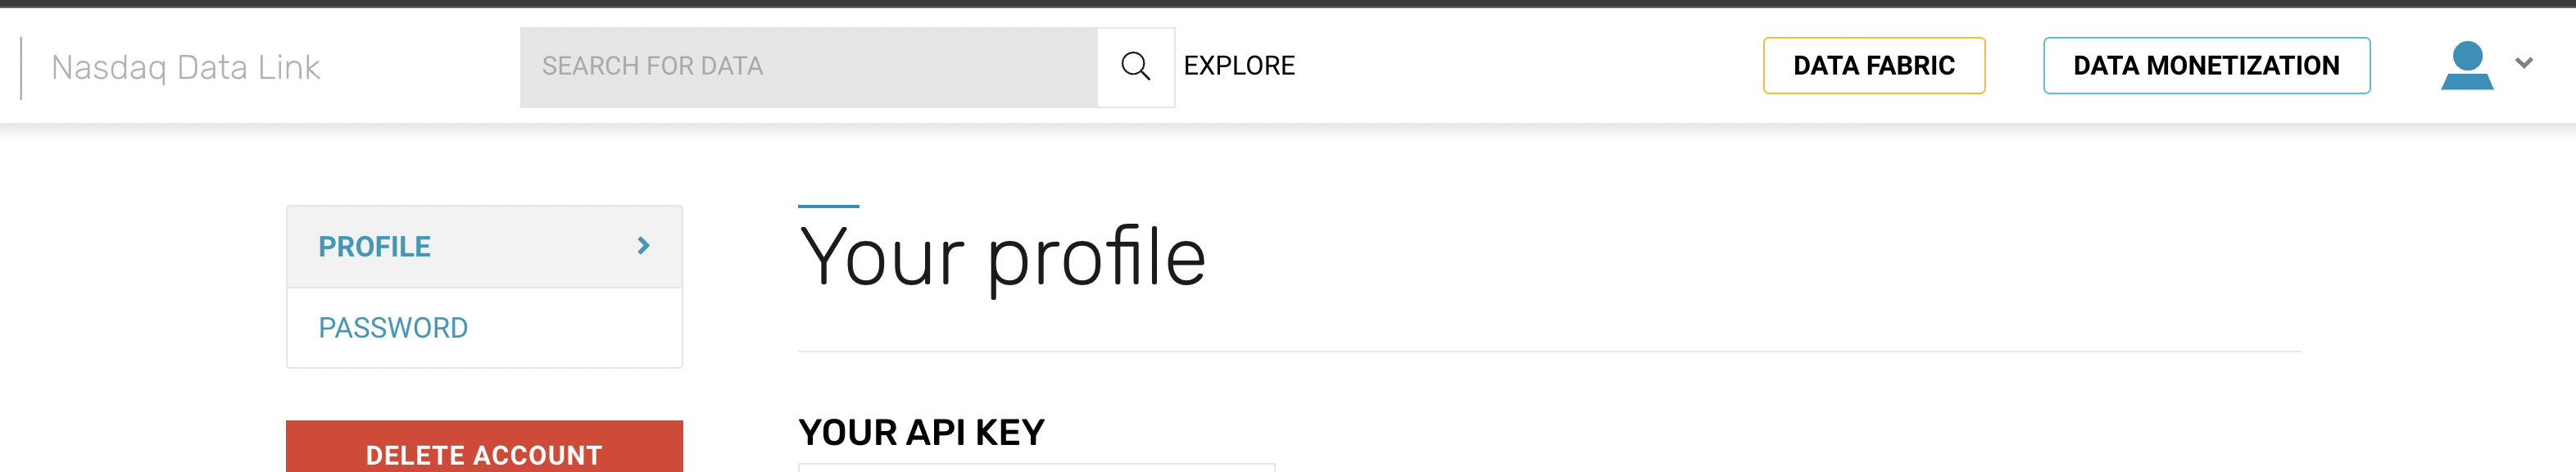
Tu api_key lo encuentras en los detalles de tu cuenta después de haber creado un usuario

In [7]:
%pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [8]:
data = quandl.get_table('WIKI/PRICES', qopts=column, ticker=ticker, date=date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data

ticker       date   adj_close
None                              
0      MSFT 2018-03-27   89.470000
1      MSFT 2018-03-26   93.780000
2      MSFT 2018-03-23   87.180000
3      MSFT 2018-03-22   89.790000
4      MSFT 2018-03-21   92.480000
...     ...        ...         ...
1677   AAPL 2016-01-08   93.677776
1678   AAPL 2016-01-07   93.185040
1679   AAPL 2016-01-06   97.291172
1680   AAPL 2016-01-05   99.233131
1681   AAPL 2016-01-04  101.783763

[1682 rows x 3 columns]

In [13]:
# Ejemplo quandl
import quandl
######################### USar la api key que les arroja la página de quandl
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['AAPL', 'MSFT','KO']
date = {'gte': '2016-01-01', 'lte': datetime.today() }
column = {'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts=column, ticker=ticker, date=date)# ticker = 'WIKI/AAPL' #'AAPL.US'

# Poner los índices como las fechas
data.set_index('date', inplace=True)
# Seleccionar los ADJ_CLOSE de ticker y renombrar las columnas
data = pd.concat([data[data['ticker'] == ticker_i] for ticker_i in ticker],
                 axis=1)['adj_close']
data.columns = ticker
data

AAPL       MSFT         KO
date                                        
2016-01-04  101.783763  52.181598  40.047007
2016-01-05   99.233131  52.419653  40.188683
2016-01-06   97.291172  51.467434  39.971447
2016-01-07   93.185040  49.677262  39.310293
2016-01-08   93.677776  49.829617  39.206398
...                ...        ...        ...
2018-03-21  171.270000  92.480000  43.000000
2018-03-22  168.845000  89.790000  42.760000
2018-03-23  164.940000  87.180000  42.330000
2018-03-26  172.770000  93.780000  42.690000
2018-03-27  168.340000  89.470000  42.890000

[561 rows x 3 columns]

<Axes: xlabel='date'>

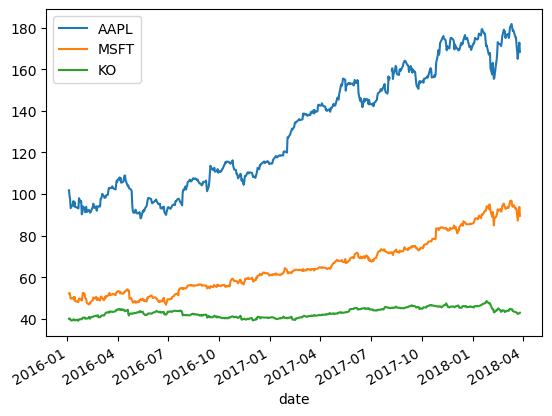

In [14]:
# Gráfica de precios
data.plot()

### Uso de Pandas para bajar datos de Yahoo! Finance
Instalación del paquete de yahoo finance

```sh
conda install -c conda-forge yfinance
```

Con el siguiente comando se pueden instalar paqueten en anaconda directamente desde el notebook

In [4]:
%conda install -c conda-forge yfinance -y

Retrieving notices: ...working... done
done
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - yfinance


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.1             |     pyhd8ed1ab_1          40 KB  conda-forge
    conda-23.9.0               |   py39h6e9494a_2         938 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         978 KB

The following NEW packages will be INSTALLED:

  archspec           conda-forge/noarch::archspec-0.2.1-pyhd8ed1ab_1 

The following packages will be UPDATED:

  ca-certificates    conda-forge/label/cf201901::ca-certif~ --> conda-forge::ca-certificates-2023.7.22-h8857fd0_0 
  conda               anaconda::conda-23.9.0-py39hecd8cb5_0 --> conda-forge::conda-23.9.0-py39h6e9494a_2 

The 

In [16]:
import pandas_datareader.data as web
import yfinance as yf

In [18]:
# Sobre escribir el método de lectura de pandas-datareader por el de yahoo-finance
yf.pdr_override()

In [59]:
# download dataframe
ticker = ['AAPL', 'MSFT', 'AEROMEX.MX']
data = web.get_data_yahoo(ticker, start="2016-01-01", end=datetime.today())
data

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close              \
                  AAPL  AEROMEX.MX        MSFT        AAPL  AEROMEX.MX   
Date                                                                     
2016-01-04   24.009064   39.110001   48.797737   26.337500   39.110001   
2016-01-05   23.407413   39.110001   49.020348   25.677500   39.110001   
2016-01-06   22.949347   39.340000   48.129879   25.174999   39.340000   
2016-01-07   21.980768   39.110001   46.455791   24.112499   39.110001   
2016-01-08   22.096998   39.110001   46.598270   24.240000   39.110001   
...                ...         ...         ...         ...         ...   
2023-10-27  168.220001  167.000000  329.809998  168.220001  167.000000   
2023-10-30  170.289993  167.000000  337.309998  170.289993  167.000000   
2023-10-31  170.770004  167.000000  338.109985  170.770004  167.000000   
2023-11-01  173.970001  167.000000  346.070007  173.970001  167.000000   
2023-11-02  177.570007         NaN  348.320007  177.570007         NaN   

                              High                                 Low  \
                  MSFT        AAPL  AEROMEX.MX        MSFT        AAPL   
Date                                                                     
2016-01-04   54.799999   26.342501   39.959999   54.799999   25.500000   
2016-01-05   55.049999   26.462500   39.500000   55.389999   25.602501   
2016-01-06   54.049999   25.592501   39.490002   54.400002   24.967501   
2016-01-07   52.169998   25.032499   39.389999   53.490002   24.107500   
2016-01-08   52.330002   24.777500   39.240002   53.279999   24.190001   
...                ...         ...         ...         ...         ...   
2023-10-27  329.809998  168.960007  167.000000  336.720001  166.830002   
2023-10-30  337.309998  171.169998  167.000000  339.450012  168.869995   
2023-10-31  338.109985  170.899994  167.000000  339.000000  167.899994   
2023-11-01  346.070007  174.229996  167.000000  347.420013  170.119995   
2023-11-02  348.320007  177.779999         NaN  348.829987  175.460007   

                                          Open                          \
            AEROMEX.MX        MSFT        AAPL  AEROMEX.MX        MSFT   
Date                                                                     
2016-01-04   38.820000   53.389999   25.652500   39.290001   54.320000   
2016-01-05   38.520000   54.540001   26.437500   39.189999   54.930000   
2016-01-06   38.799999   53.639999   25.139999   39.110001   54.320000   
2016-01-07   38.560001   52.070000   24.670000   39.320000   52.700001   
2016-01-08   38.750000   52.150002   24.637501   39.240002   52.369999   
...                ...         ...         ...         ...         ...   
2023-10-27  167.000000  328.399994  166.910004  167.000000  330.429993   
2023-10-30  167.000000  331.829987  169.020004  167.000000  333.410004   
2023-10-31  167.000000  334.690002  169.350006  167.000000  338.850006   
2023-11-01  167.000000  339.649994  171.000000  167.000000  339.790009   
2023-11-02         NaN  344.769989  175.520004         NaN  347.239990   

                 Volume                         
                   AAPL AEROMEX.MX        MSFT  
Date                                            
2016-01-04  270597600.0   695241.0  53778000.0  
2016-01-05  223164000.0   206477.0  34079700.0  
2016-01-06  273829600.0   163875.0  39518900.0  
2016-01-07  324377600.0   584628.0  56564900.0  
2016-01-08  283192000.0    57154.0  48754000.0  
...                 ...        ...         ...  
2023-10-27   58499100.0        0.0  29856500.0  
2023-10-30   51131000.0        0.0  22828100.0  
2023-10-31   44846000.0        0.0  20265300.0  
2023-11-01   56934900.0        0.0  28158800.0  
2023-11-02   76083900.0        NaN  24299600.0  

[2028 rows x 18 columns]

In [23]:
type(data.to_frame())

pandas.core.frame.DataFrame

Para efectos del curso y debido a que en yahoo finance podemos tener acceso a activos de la bolsa méxicana vamos a utilizar de acá en adelante el paquete de DataReader y la siguiente función para descargar precios de distintos activos:

In [60]:
def get_adj_closes(tickers, start_date=None, end_date=None, cols2return=None):
    if cols2return is not None:
        cols = cols2return
    else:
        cols = 'Adj Close'
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)[cols]
    # Solo necesitamos los precios ajustados en el cierre
#     closes = closes[cols]
    # Se ordenan los índices de manera ascendente
#     closes.sort_index(inplace=True)
    
    if len(tickers) == 1:
        closes = closes.to_frame().copy()
        closes.columns = [tickers]
    return closes

In [62]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2018-01-01'
end = None
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes

[*********************100%***********************]  4 of 4 completed


AAPL        MSFT        NVDA        ^GSPC
Date                                                       
2018-01-02   40.776524   80.391846   49.317131  2695.810059
2018-01-03   40.769417   80.765984   52.562881  2713.060059
2018-01-04   40.958809   81.476837   52.839951  2723.989990
2018-01-05   41.425117   82.487007   53.287731  2743.149902
2018-01-08   41.271252   82.571182   54.920498  2747.709961
...                ...         ...         ...          ...
2023-10-27  168.220001  329.809998  405.000000  4117.370117
2023-10-30  170.289993  337.309998  411.609985  4166.819824
2023-10-31  170.770004  338.109985  407.799988  4193.799805
2023-11-01  173.970001  346.070007  423.250000  4237.859863
2023-11-02  177.570007  348.320007  435.059998  4317.779785

[1470 rows x 4 columns]

<Axes: xlabel='Date'>

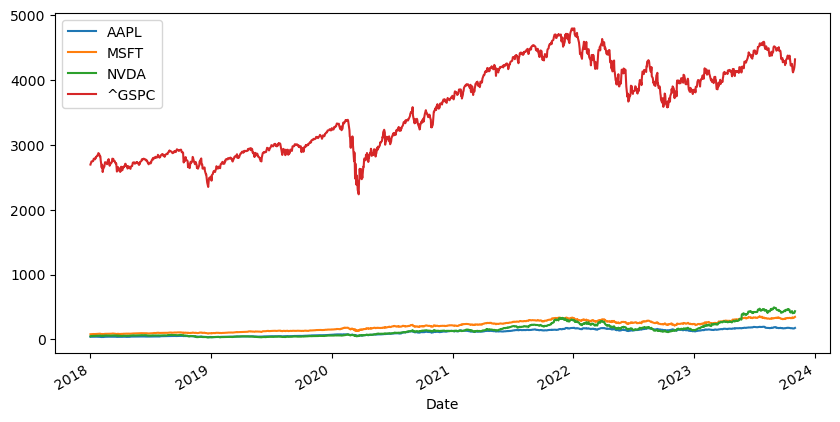

In [27]:
# Gráfica de datos
closes.plot(figsize=(10,5))

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Nvidia:NVDA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [28]:
closes.columns

Index(['AAPL', 'MSFT', 'NVDA', '^GSPC'], dtype='object')

Acceder a alguna posición específica de la variable *closes*

In [30]:
# Uso de la función iloc
closes.iloc[0,0]

40.77652359008789

Si deseamos encontrar los precios de cierre en una fecha específica usamos 

In [31]:
# Uso de la función loc
closes.loc['2018-01-02', 'AAPL']

40.77652359008789

O, finalmente, los valores del S&P500

In [32]:
# Selección de alguna columna
closes['AAPL']

Date
2018-01-02     40.776524
2018-01-03     40.769421
2018-01-04     40.958794
2018-01-05     41.425129
2018-01-08     41.271255
                 ...    
2023-10-27    168.220001
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
Name: AAPL, Length: 1470, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

> Revisar los nombres de estas acciones en yahoo: https://finance.yahoo.com/

In [33]:
# nombre de los activos mexícanos en yahoo
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']

start = '2014-01-02'
end = '2014-12-31'
assets_mx = get_adj_closes(tickers=ticker_mx, start_date=start, end_date=end)
assets_mx

[*********************100%***********************]  4 of 4 completed


AEROMEX.MX  GCARSOA1.MX  GFINBURO.MX  GFNORTEO.MX
Date                                                         
2014-01-02   18.049999    60.659286    32.456120    62.490952
2014-01-03   18.090000    60.992928    32.040482    63.085907
2014-01-06   18.469999    59.078945    31.173065    61.964382
2014-01-07   19.459999    58.622383    32.212166    62.190060
2014-01-08   18.990000    58.183388    31.344738    61.608776
...                ...          ...          ...          ...
2014-12-23   19.500000    65.011482    34.246983    56.182209
2014-12-24   19.639999    65.206764    33.982059    55.498741
2014-12-26   19.629999    66.156548    34.320053    55.471134
2014-12-29   19.520000    66.493874    34.986908    56.016525
2014-12-30   20.389999    65.224518    34.740261    55.636814

[250 rows x 4 columns]

In [39]:
# Encontrar los precios en la fecha 2014-07-14
assets_mx_20140714 = assets_mx.loc['2014-07-14']
assets_mx_20140714

Symbols
GCARSOA1.MX    66.896530
GFINBURO.MX    35.452789
GFNORTEO.MX    76.305168
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [40]:
# Encontrar la acción que reportó mayor valor en la fecha 2014-07-14
assets_mx_20140714.idxmax(), assets_mx_20140714.max()

('GFNORTEO.MX', 76.30516815185547)

In [141]:
assets_mx_20140714

Symbols
GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [42]:
# Acceder a algunas filas particulares de los precios (iloc)
assets_mx.iloc[4:6, :]

Symbols     GCARSOA1.MX  GFINBURO.MX  GFNORTEO.MX  AEROMEX.MX
Date                                                         
2014-01-08    60.626831    31.344736    75.005836       18.99
2014-01-09    59.638805    31.218237    75.713531       19.16

In [43]:
assets_mx.iloc[0]

AEROMEX.MX     18.049999
GCARSOA1.MX    60.659286
GFINBURO.MX    32.456120
GFNORTEO.MX    62.490952
Name: 2014-01-02 00:00:00, dtype: float64

In [43]:
#encontrar la diferencias entre dos filas en particular
assets_mx.iloc[0, :] - assets_mx.iloc[-1, :]

Symbols
GCARSOA1.MX   -3.933773
GFINBURO.MX   -2.329815
GFNORTEO.MX    7.831909
AEROMEX.MX    -2.390001
dtype: float64

# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [72]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = None#datetime.today()
cols = ['Adj Close', 'Volume']
aero_mx = get_adj_closes(ticker, start, end, cols)
aero_mx

[*********************100%***********************]  1 of 1 completed


Adj Close  Volume
Date                          
2015-01-02   19.389999  452156
2015-01-05   20.030001  467183
2015-01-06   19.570000  301361
2015-01-07   19.430000  222100
2015-01-08   20.840000  289943
...                ...     ...
2023-10-26  167.000000       0
2023-10-27  167.000000       0
2023-10-30  167.000000       0
2023-10-31  167.000000       0
2023-11-01  167.000000       0

[2225 rows x 2 columns]

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

<Axes: xlabel='Date'>

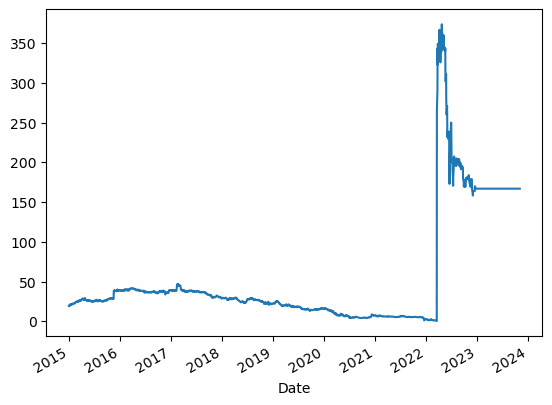

In [73]:
closes_aero_mx = aero_mx['Adj Close']
closes_aero_mx.plot()

De forma similar, se grafica la serie de volúmenes de transacción

<Axes: xlabel='Date'>

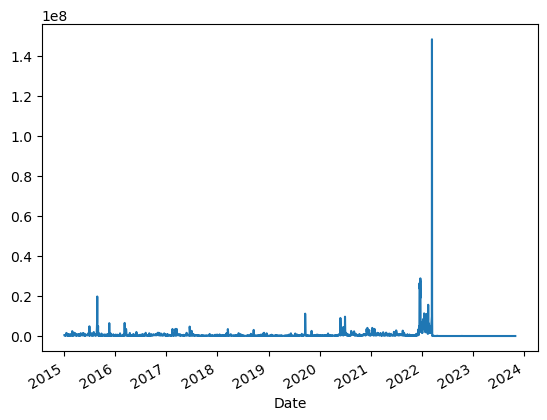

In [75]:
vol_aero_mx = aero_mx['Volume']
vol_aero_mx.plot()

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

In [77]:
import matplotlib.pyplot as plt

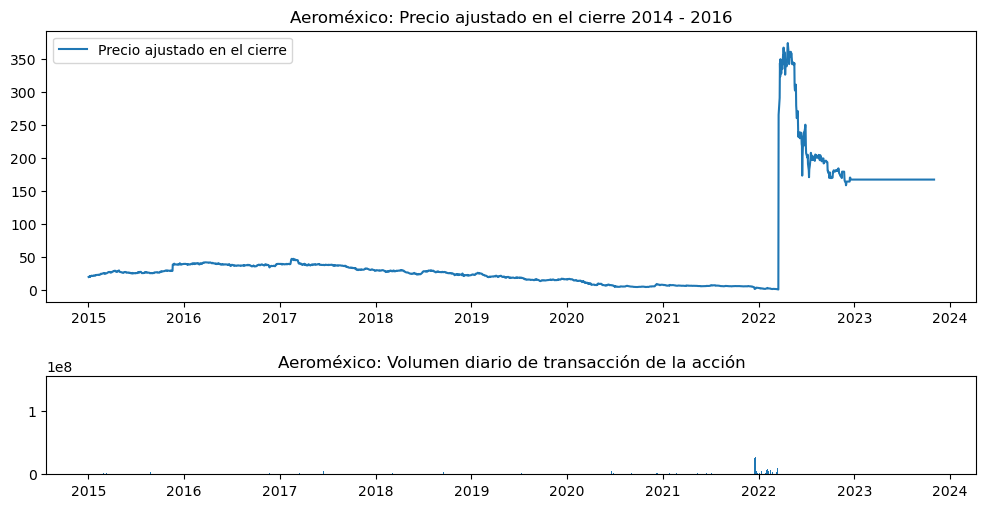

In [79]:
############## Forma de graficar 1
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(closes_aero_mx.index, closes_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (2, 0), rowspan=1, colspan=4)
bottom.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)


############## Otra forma de graficar
# plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
# plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
# plt.show()

# plt.figure(figsize=(10,5))
# plt.subplot(2,1,2)
# plt.bar(vol_aero_mx.index, vol_aero_mx)
# plt.title('Aeroméxico: Volumen diario de transacción de la acción')
# plt.xlabel('Date')
# plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
# plt.ylim([0,.8e7])
# plt.show()

### Graficar usando paquete `plotly`
En el caso que deseen compilar los gráficos usando la paquetería ploty deben instalar está con el siguiete comando

` conda install -c plotly plotly `

Documentación [subplots](https://plotly.com/python/subplots/)

In [80]:
%conda install -c plotly plotly

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       hecd8cb5_0         124 KB
    certifi-2023.7.22          |   py39hecd8cb5_0         154 KB
    openssl-1.1.1w             |       hca72f7f_0         2.8 MB
    plotly-5.18.0              |             py_0         7.2 MB  plotly
    ------------------------------------------------------------
                                           Total:        10.3 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> pkgs/main::ca-certificates-2023.08.22-hecd8cb5_0 
  plotly             pkgs/main/osx-64::plotly-5.9.0-py39he~ --> plotly/noarch::plotly-5.18.0-py_0 

The following packages wi

In [81]:
pd.options.plotting.backend = "plotly"

In [82]:
closes_aero_mx.plot()

In [84]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=closes_aero_mx.index, y=closes_aero_mx.values, name='Adj Closes'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=vol_aero_mx.index, y=vol_aero_mx.values, name='Volume'),
    row=2, col=1
)

fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [88]:
# Realizar una media móvil con ventana de 20 y 100 para los precios de cierre ajustado
short_rollmean_AM_AC = closes_aero_mx.rolling(window=100).mean()
short_rollmean_AM_AC

Date
2015-01-02      NaN
2015-01-05      NaN
2015-01-06      NaN
2015-01-07      NaN
2015-01-08      NaN
              ...  
2023-10-26    167.0
2023-10-27    167.0
2023-10-30    167.0
2023-10-31    167.0
2023-11-01    167.0
Name: Adj Close, Length: 2225, dtype: float64

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

In [94]:
# Poner por defecto nuevamente matplotlib
pd.options.plotting.backend = "matplotlib" 

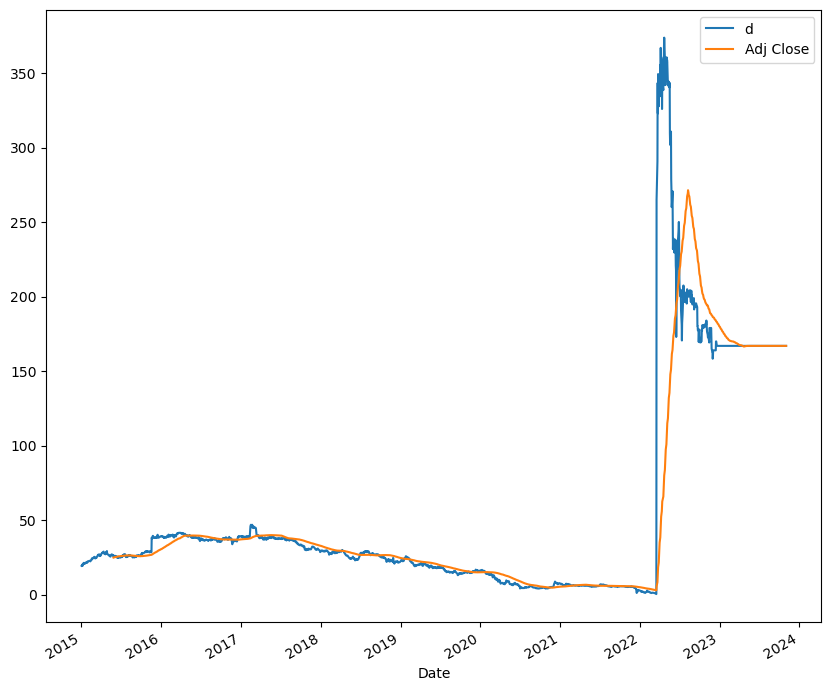

In [95]:
# Gráfica de los precios de cierre ajustados y sus medias móviles
fig, ax = plt.subplots(1,1, figsize=(10,9))
closes_aero_mx.plot(ax=ax, label='d')
short_rollmean_AM_AC.plot(ax=ax)
plt.legend()

Las desviaciones estándar móviles se calculan con

In [96]:
short_rollstd_AM_AC = closes_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = closes_aero_mx.rolling(window=100).std()

y los gráficos...

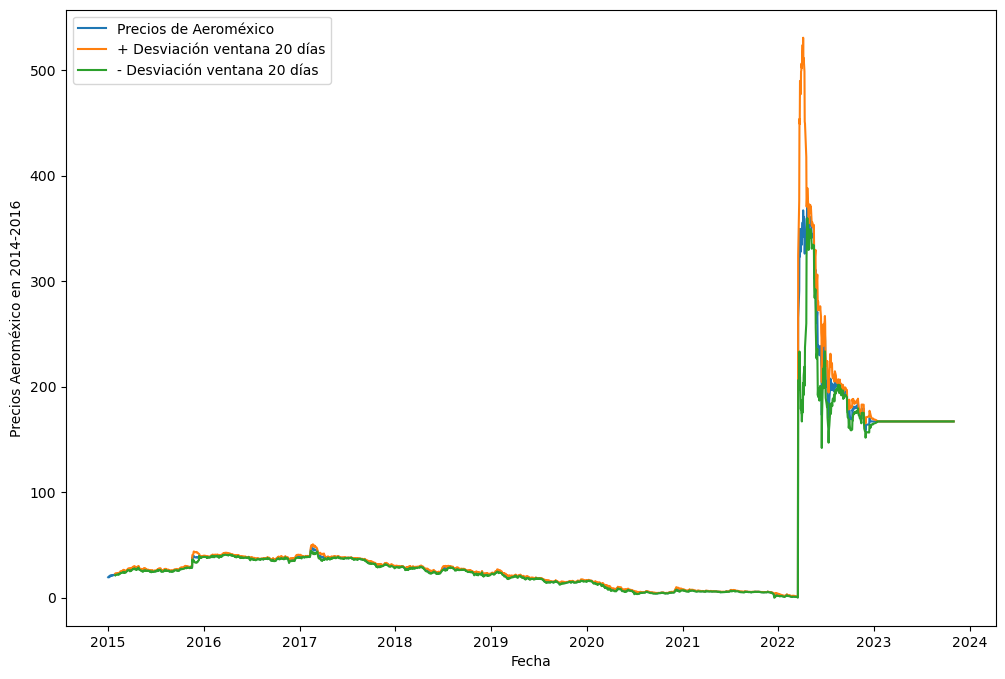

In [98]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(closes_aero_mx.index, closes_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(closes_aero_mx.index, closes_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(closes_aero_mx.index, closes_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

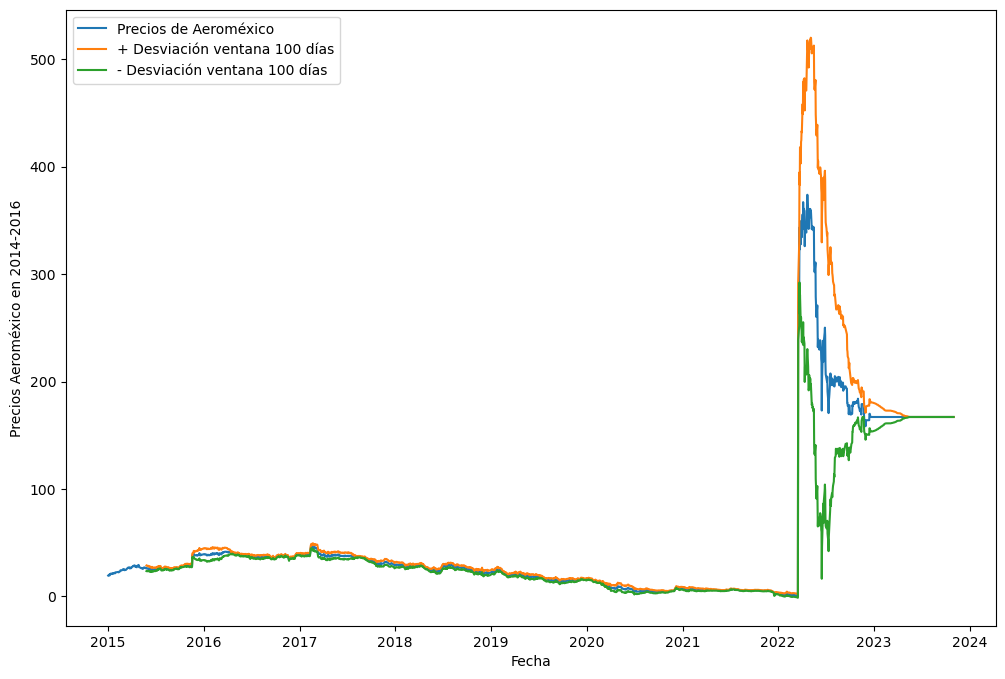

In [99]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(closes_aero_mx.index, closes_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(closes_aero_mx.index, closes_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(closes_aero_mx.index, closes_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modified by Oscar Jaramillo Z.
</footer>